# Getting Started with Python

## Import Statements

Python has a number of built in functionality, but many of the most useful tools and functions come require us to [import](https://docs.python.org/3/reference/simple_stmts.html#import) modules.

* Modules are pre-written blocks of code, sometimes referred to as packages or libraries.
* They are built for addressing specific tasks: e.g. linear algebra, mapping, plotting.

We're importing:
* [numpy](https://numpy.org/)
* [pandas](https://pandas.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# This allows us to create interactive plots with matplotlib
%matplotlib notebook

# Step 2) Importing our data

* We'll use a Pandas to import three .csv files using the .read_csv() function to load them as "DataFrames"
    * We can set the header, automatically interpret dates, an set our table indexes

In [2]:
# incident.csv contains postal code of the incident, province, municipality, along with the date and incident ID
Incident = pd.read_csv(
    'Data/incident.csv',
    delimiter = ',',
    header = 0,
    parse_dates=['date'],
    index_col=['id_incident']
)

# victim.csv contains information on the victms including age, race, etc.
Victim = pd.read_csv(
    'Data/victim.csv',
    delimiter = ',',
    header = 0, 
    index_col=['id_incident']
)

#police.csv contaisn information about the police department and oficer involved
Police = pd.read_csv(
    'Data/police.csv',
    delimiter = ',',
    header = 0, 
    index_col=['id_incident']
)
print('Data Loaded.')

Data Loaded.


# Step 3) Joining all our data

* The three files share the same index "id_incident"
    * We can use this unique identifier to combine all our files into one.
* Then we can set the date as the index.

In [3]:
# First we'll join the incident and the victim records
Join_1 = Incident.join(Victim)
# Then we'll join the the police record
Join_2 = Join_1.join(Police)

# Resetting the index first allows us to keep 'id_incident'.
# We can call set_index('date') to set the date as the index.
# Setting drop to true, means that 'date' won't be duplicated as a column
Police_Killings = Join_2.reset_index().set_index('date',drop = True)

# Caling .columns function will give us all the column headers
print(Police_Killings.columns)

# Calling .head() will print the first 5 rows
Police_Killings.head()


Index(['id_incident', 'day_week', 'prov', 'city_town', 'postal_code',
       'location_type', 'id_victim', 'Name', 'age', 'gender', 'race',
       'ethnic_ancestry', 'immigrant_refugee_naturalized', 'armed_type',
       'cause_death', 'taser_deployed', 'injured_officer', 'excited_delirium',
       'mentral_distress_disorder', 'substance_abuse', 'summary', 'Department',
       'charge_type', 'Charges', 'Officers Involved'],
      dtype='object')


,id_incident,day_week,prov,city_town,postal_code,location_type,id_victim,Name,age,gender,...,taser_deployed,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary,Department,charge_type,Charges,Officers Involved
date,,,,,,,,,,,,,,,,,,,,,
2012-01-06,1,Fri,QC,Montreal,H3B 4W5,Urban,0001-V1,*****,34.0,Male,...,No,Yes,No,Yes,Yes,Farshad Mohammadi was carrying a knife when he...,Service de police de la Ville de Montreal,None,No,0001-P1
2012-01-11,2,Wed,AB,Onoway,T0E 1V0,Rural,0002-V1,*****,49.0,Male,...,No,No,No,Unknown,Yes,RCMP called to an apartment complex in respons...,RCMP,None,No,0002-P1
2012-01-12,3,Thu,ON,Oakville,L6H 0G6,Urban,0003-V1,*****,43.0,Male,...,No,No,No,Unknown,Unknown,Kyle Newman intentionally and repeatedly struc...,Halton Regional Police Service,None,No,0003-P1
2012-02-03,4,Fri,ON,Toronto,M4C 1X5,Urban,0004-V1,*****,29.0,Male,...,No,No,No,Yes,No,"Michael Eligon, who had been involuntarily com...",Toronto Police Service,None,No,0004-P1
2012-02-13,5,Mon,ON,Hamilton,L8K 5J4,Urban,0005-V1,*****,27.0,Male,...,No,No,No,Yes,Unknown,"Police had a stolen van under surveillance, an...",Hamilton Police Service,None,No,0005-P1


# Step 4) Exploring the data

* Pandas has special functions
    * We can count, and summarize different variables

* We can quickly calculate statistics like averages or resample by a specific interval (e.g. Yearly) 
* We can use matplotlib.pyplot (plt) to display our information

Number of Incidents:  462
Descriptive Statistics Age: 
 count    455.000000
mean      36.731868
std       11.775739
min       15.000000
25%       27.500000
50%       36.000000
75%       45.000000
max       77.000000
Name: age, dtype: float64

LinregressResult(slope=1.0485036119711042, intercept=-2080.252837977296, rvalue=0.7543604262227599, pvalue=0.0002978828736845745, stderr=0.22810752954681113)


<IPython.core.display.Javascript object>


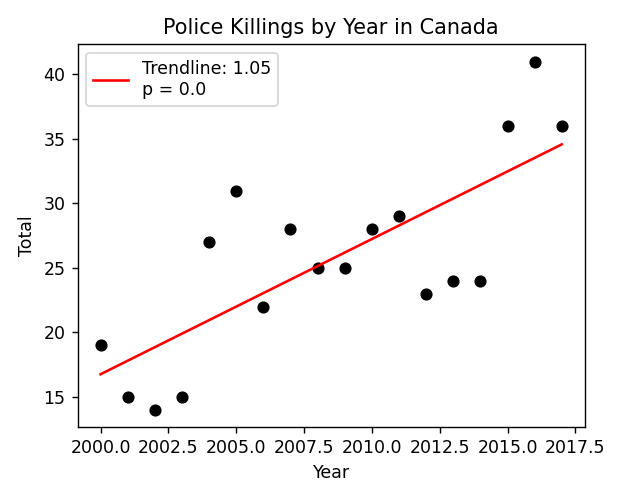

In [4]:
print('Number of Incidents: ',Police_Killings['id_incident'].count())
print('Descriptive Statistics Age: \n', Police_Killings['age'].describe())
print()

# Resample will aggregate the data over a given time interval
# 'Y' specifes we want years.  If you wanted monthly, you'd do 'M'
# .count() specifies how to aggregate.  If you have numeric data you can use .mean(), .std() etc. instead
# with text, you're limited to .count(), .first(), .last()
Yearly = Police_Killings.resample('Y').count()

## The linregress() function calcualtes a linear regression between the year and the number of killings
LR = stats.linregress(Yearly.index.year,Yearly['id_incident'])
print(LR)

# We can create a figure size 5x4
plt.figure(figsize=(5,4))

# .scatter() allows us to plot points
plt.scatter(Yearly.index.year,
            Yearly['id_incident'],
           color='black')

# .plots() allows us to plot lines
plt.plot(Yearly.index.year,
         Yearly.index.year*LR[0]+LR[1],
         color='red',
         label='Trendline: '+str(np.round(LR[0],2))+'\np = '+str(np.round(LR[3],3)))

# We can set some specifics here.
plt.title('Police Killings by Year in Canada')
plt.xlabel('Year')
plt.ylabel('Total')

# Calling .legend() will display all entites we set a label for
plt.legend()

# .tight_layout() allows us to make sure things fit nicely
plt.tight_layout()

### We can also aggregate using .groupby()

* This lets us conduct specific queries like:
    * ### What type of weapon did the victim have?

<IPython.core.display.Javascript object>


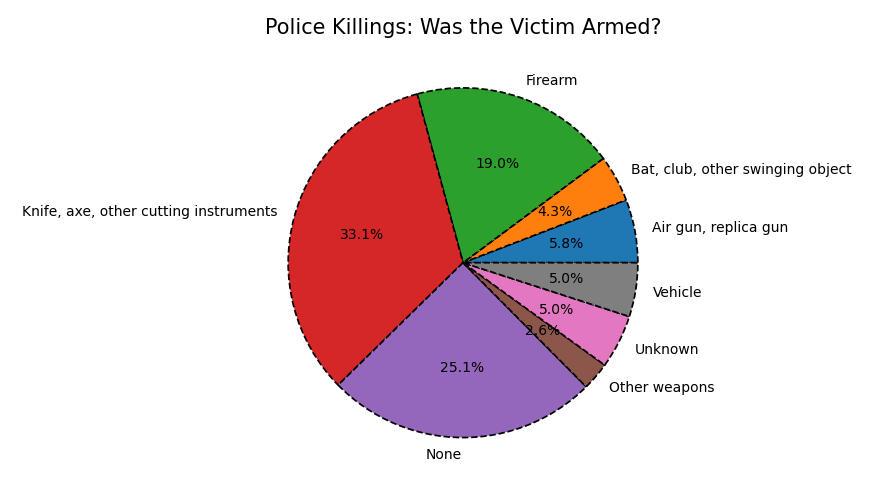

In [5]:
# .groupby() accepts one or more records to aggregate by
# .count() tells us how to aggregate
Armed = Police_Killings.groupby(['armed_type']).count()

plt.figure(figsize=(7,4))

# .pie() creates a pie chart
plt.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
plt.title('Police Killings: Was the Victim Armed?')
plt.tight_layout()


### Lets make these categories easier to interpret
* We can create a dictionary define the replacements we want to make
* We can use some of pandas special functions to query and manipulate our data
    * The .loc[] function allows us to search for records
    * The .replace () function lets us replace values

<IPython.core.display.Javascript object>


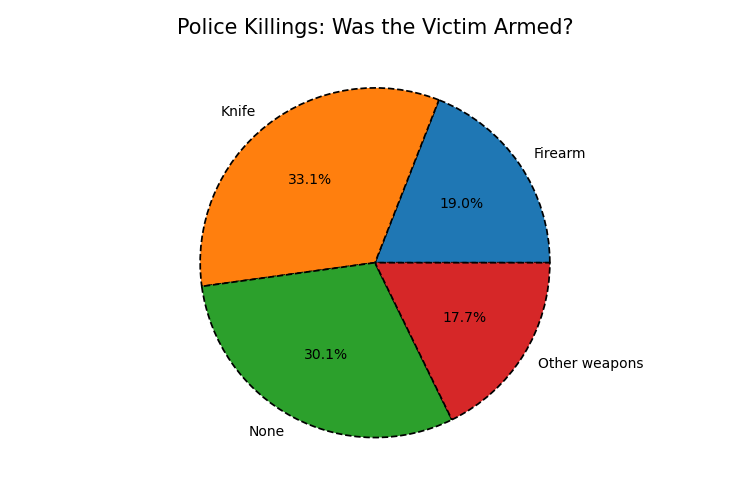

In [6]:
# Dictionaries use keys (eg. 'Vehicle') an values (eg. 'Other weapon')
# They let us quickly look up values by a key
replace_dict = {
    'Air gun, replica gun':'Other weapons',
    'Bat, club, other swinging object':'Other weapons',
    'Vehicle':'Other weapons',
    'Knife, axe, other cutting instruments':'Knife',
    'Unknown':'None'
          }

# We can loop through te keys in the dictionary and use them to replace the disired values
# .loc[] is a search command that allows us to perform specific querries
# we can use it in combination with an equal sign (=) to replace values for a given column(s)
for r in replace_dict.keys():
    Police_Killings.loc[Police_Killings['armed_type']==r,'armed_type']=replace_dict[r]
        
        
# Just making the same pic graph again
plt.figure(figsize=(6,4))
Armed = Police_Killings.groupby(['armed_type']).count()
plt.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
plt.title('Police Killings: Was the Victim Armed?')
plt.tight_layout()

### We can also make multiple plots together

<IPython.core.display.Javascript object>


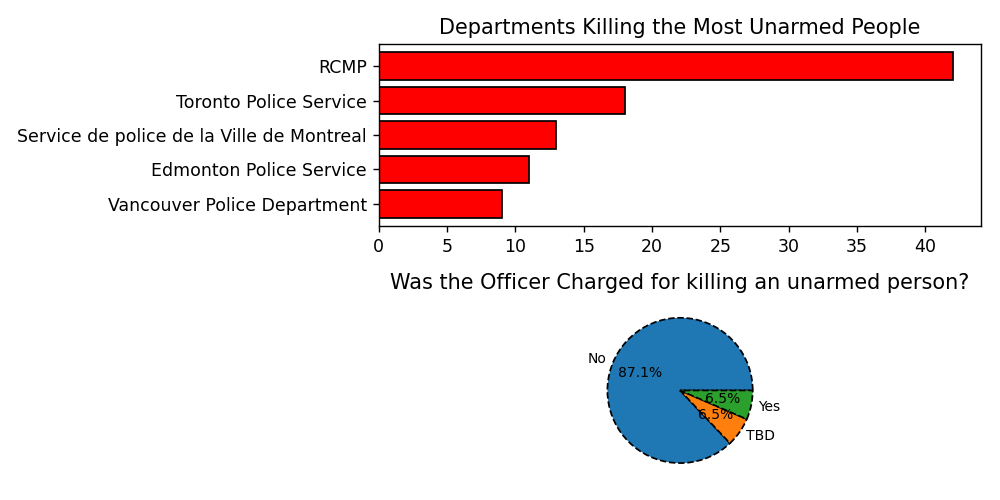

In [8]:
fig,ax= plt.subplots(2,1,figsize=(8,4))

# Groupby allows us to search fo multiple records
Force = Police_Killings.groupby(['Department','armed_type']).count()['id_victim']#.sort_values(ascending=True)

Force=Force.unstack()
col = Force.columns
# Force['Total']=Force.sum(axis=1)
# for c in col:
#     Force[c] /= Force['Total']

# Force = Force.sort_values(by='Total',ascending=False)#
# print(Force)
Force = Force.loc[Force['None']>1].sort_values(by='None')[-5:]

# Force = Police_Killings.groupby('Department').count()['id_victim'].sort_values(ascending=True)
ax[0].barh(Force.index,Force['None'],facecolor='#FF0000',edgecolor='black')
ax[0].set_title('Departments Killing the Most Unarmed People')


Charges = Police_Killings.loc[Police_Killings['armed_type']=='None'].groupby('Charges').count()
ax[1].pie(
    Charges['id_victim'],
    labels=Charges.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
ax[1].set_title('Was the Officer Charged for killing an unarmed person?')


plt.tight_layout()

### To look at the racial data, we need to normalize first
* Canada is predominately white, we have to scale each group by the size of their population to calculate a police killing rate
    * We want calculate the Police Killing Rate per Million Residents per Year for White, Black, and Indigenous people.
    * What should we use as the scale factor?
        * Hint the dataset spans the years 2000 to 2017
    

<IPython.core.display.Javascript object>


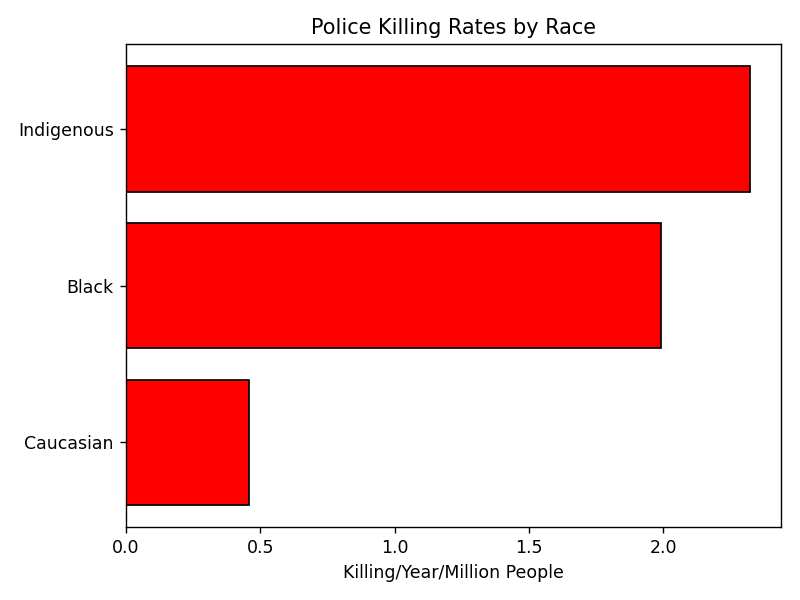

(18,)


In [9]:
Race=['Caucasian','Black','Indigenous']
Population=[25803368,1198545,1673780]

scale = 1e6/18

Count = Police_Killings.groupby('race')['id_incident'].count()

plt.figure()

i=0
for race,population in (zip(Race,Population)):
    if race == 'Total Population':
        rate=((Count.sum()/population)*scale)
    else:
        rate=((Count[race]/population)*1e6/18)
    plt.barh(i,rate,color='#FF0000',edgecolor='black')
    i += 1
plt.yticks([0,1,2],Race)
plt.title('Police Killing Rates by Race')
plt.xlabel('Killing/Year/Million People')
plt.tight_layout()
    
print(Police_Killings.index.year.unique().shape)#.count())

# Step 5 Saving Data

* We can save our data easily using the [.tocsv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) function



In [10]:
Police_Killings.to_csv('Data/PoliceKillings.csv')
print('Data Saved')

Data Saved


# Step 4) Geocoding & Webmap Examples

* Geocoding is a method of getting the x,y (latitude and longitude) coordinates for an entity based on a text description.
    * geopy has multiple geocoder options.  You can use googel, bing, open streetmaps, etc.
    * We're using Mapbox becsue we get up to 15,000 free geocodes per month!
        * Make sure you've entered your API key at the top of the notebook
        
### This will return our full address and we can print our lattitude and longitude

In [ ]:
geolocator = MapBox(api_key=api_key)

# Lets try a simple example first!  Type any address here and see what comes up!
Test_Point = geolocator.geocode("2710 Fraser St. Vancouver BC")#,exactly_one=False)

print(Test_Point)
print(Test_Point.latitude,Test_Point.longitude)

### We can go in the opposite directin too, getting an address associated with a poin coordinate.

In [ ]:
Test_Point = geolocator.reverse(['49.260438','-123.088896'])
print(Test_Point)

## Lets make a webmap, centered on the address, displaying it as a blue dot

* We'll use a pacakge called Follium:
    * First we'll crate a Map, we'll call it Map.
    * We'll set the location with our home lattitude and longitude, and set some other paramters.
* Then we'll add our Test_Point using a CircleMarker.
* The last step is to "call" the map, so it will display below

In [ ]:
Map = folium.Map(
    location=[Test_Point.latitude,Test_Point.longitude],
    zoom_start=11,
)

point=folium.CircleMarker(
        location=[Test_Point.latitude,Test_Point.longitude],
        radius=10,
        popup='Home!',
        fill_opacity = 1,
        fill=True,
        color='black',
        line_weight=.35,
        fill_color='blue'
)

point.add_to(Map)

Map

## We've just created an interactive map.  Pretty cool right!?
* You can zoom and pan.  Click on your home and see what happens!

### This is handy, but if we have multiple points calling .CircleMarker repeatedly can be cumbersome

* We can create a function to handle the details for us, and make it repeatable


* We run the CircleMarker() function and add it to the map with one statement.

In [ ]:
# "def" defines our function "plot_point()", which takes five "arguments":
    # Map: The map you're working with
    # X & Y: lattitude & longitude
    # Popup_Text: What do we want the popup to say?
    # Color: We'll set a defualt, but we can override with what colour do we want
        # Everything else will remain the same for every point, so we can set them as default values
    # Defaults can be over written by assigning them anoter value
def plot_point(Map,X,Y,Popup_Text,Color='olive',Radius=5,Opacity=.75,LineColor='black',LineWidth=.15):
    folium.CircleMarker(
        # The coordiatnates
        location=[X,Y],
        # Text description
        popup=Popup_Text,
        # sets the fill color for the point
        fill_color=Color,
        # Size of the marker
        radius=Radius,
        # Opacity of the circle
        fill_opacity = Opacity,
        # Sets the line color for the edge
        color=LineColor,
        # Width of the border line
        line_weight=LineWidth,
    ).add_to(Map)

## Lets explore the idea of geocoding a bit more!

* Geocoding requires specific information, otherwise, you may "confuse" the service

* Surrey or Victoria are well known cities in BC, but if you search for them withouth specifying "BC", you'll end up with the bigger, more populous cities that share their name

In [ ]:
# We can set the basemap to terrain
ExampleMap = folium.Map(
    location=[0,0],
    zoom_start=2,
    tiles='Stamen Terrain'
)

Surrey = geolocator.geocode('Surrey')
plot_point(ExampleMap,Surrey.latitude,Surrey.longitude,'Surrey, UK','green')

SurreyBC = geolocator.geocode('Surrey, BC')
plot_point(ExampleMap,SurreyBC.latitude,SurreyBC.longitude,'Surrey, BC','yellow')

Victoria = geolocator.geocode('Victoria')
plot_point(ExampleMap,Victoria.latitude,Victoria.longitude,'Victoria, AU','blue')

VictoriaBC = geolocator.geocode('Victoria, BC')
plot_point(ExampleMap,VictoriaBC.latitude,VictoriaBC.longitude,'Victoria, BC','orange')

ExampleMap

# Step 5) Geocode the Police Violence Dataset?

* This dataset has zipcodes, which are is a very specific identifier
    * It also came with the street address of the incident, but I've removed that information to for privacy sake
    
    
* We'll serach for each incident using the following search:
    * City + polstal code + Provicne
    
* Some of our requests may fail! So we can try again with the city and province if so.
    * We'll leave it blank and add a note saying Geocoding Failed.

In [ ]:
# We'll create empty columns for latitude & longitude
# We'll create a "notes" column as well
Police_Killings['latitude'] = np.nan
Police_Killings['longitude'] = np.nan
Police_Killings['geocoding_Notes'] = ''

i = 0
# iterrows() allows us to loop through row by row
for index, row in Police_Killings.iterrows():
    # try statements let us attempt something.
    try:
        # ' '.join() concatenates the records with spaces between
        attempt = ' '.join([row['city_town'], row['prov'], row['postal_code'],'Canada'])
        
        # Progress report
        if i % 25 == 0:
            clear_output()
            print("PROGRESS: {} out of {}. Currently at: {}".format(i, len(Police_Killings), row['id_incident']))
        
        # We'll querry the geocoder.  We'll set timeout to 3 seconds so it has ample time for each query
        g = geolocator.geocode(attempt,timeout=3)
        Police_Killings.loc[Police_Killings['id_incident']==row['id_incident'],
                    ['latitude','longitude']]=g.latitude,g.longitude
    # if the try fails, we get an exception
    # We can tell it to add to the geocoding notes and pass to the next row
    except:
        Police_Killings.loc[Police_Killings['postal_code']==row['postal_code'],
                    'geocoding_Notes']='Geocoding Failed'
        pass
    i += 1
print('Geocoding Done')


# Step 6) Quality Control - How well did this work?

* We'll plot the points by province and see if they end up in the right place.
    * Maybe there were some typos during data entry.

In [ ]:
# Dictionary of province colors
color_Scheme = {
    'BC':'red',
    'AB':'hotpink',
    'SK':'orange',
    'MB':'green',
    'ON':'darkorange',
    'QC':'blue',
    'NB':'purple',
    'NS':'yellow',
    'NL':'white',
    'PE':'black',
    'YT':'teal',
    'NU':'lime',
    'NT':'cyan',
}

## We can set the basemap to a basic black and white
CanadaMap = folium.Map(
    location=[60,-95.5],
    zoom_start=3,
    tiles='Stamen Toner'
)


for index, row in Police_Killings.iterrows():
    # if the geocoding didn't fail, we'll plot the point, colored by the province
    if row['geocoding_Notes'] != 'Geocoding Failed':
        plot_point(Map=CanadaMap,
                   X=row['latitude'],
                   Y=row['longitude'],
                   Popup_Text=row['race']+' '+ row['gender'] + ' '+ str(row['age'])\
                     + ' '+ row['city_town'] + ' '+ row['prov']+ ' '+ row['postal_code'],
                   Color=color_Scheme[row['prov']]
                  )

CanadaMap

### Everything looks in order here.  Lets see if we had any failures?

In [ ]:
Failures = (Police_Killings.loc[Police_Killings['geocoding_Notes']=='Geocoding Failed',
                          ['prov','city_town','postal_code']])
print(Failures)

### Looks like maybe the slashes in the names threw they geodocer off?
* Lets only search the city name before the slash and see if that fixes it!

In [ ]:
for index, row in Police_Killings.loc[Police_Killings['geocoding_Notes']=='Geocoding Failed'].iterrows():
    try:
        attempt = ' '.join([row['city_town'].split('/')[0], row['prov'], row['postal_code'],'Canada'])
        g = geolocator.geocode(attempt,timeout=6)
        Police_Killings.loc[Police_Killings['id_incident']==row['id_incident'],
                        ['latitude','longitude','city_town']]=g.latitude,g.longitude,row['city_town'].split('/')[0]
        print('Fixed!!')
    except:
        print("Geocoding Still Failed :'(")
    

# Step 7) Saving the Data

In [ ]:
# The .to_csv() function will allow us to save data to a specific location
Police_Killings.to_csv('Data/PoliceKillings.csv')
print('Data Saved!')

# Step 8) Importing vector data

### In another workshop, we take the data we geocoded and combined it with provincial census data

* This allowed us to calculate the Police Killing Rate (PKR) by province.

### We saved this data as a shapefile.  We can import it using geopandas
* Geopandas is a spatial extension for pandas that handles shapefiles

In [ ]:
# the .read_file() function reads shapefiles
Provincial_Data = gpd.read_file('Data/Provincial_Police_Violence.shp')
print(Provincial_Data.crs)
Provincial_Data.head()

# Step 9) Converting Vector Data
* Folium can't read shapefiles :(
    * It needs the data to be in "GeoJSON" format to display on a webmap.
        * GeoJSON is essentially a dictionary for geospatial data
    * Geopandas allows us to save our data as a "GeoJSON"
    
* Also, WebMaps use the WGS 1984 Datum, EPSG: 4326
    * Our shapefile is in Lambert Conformal Conic, EPSG: 3347
    * We have to change the proection for it to display properly

In [ ]:
# .to_crs()changes the coordinate system
Provincial_Data = Provincial_Data.to_crs('EPSG:4326')
# .to_file() saves our data to the specified format
Provincial_Data.to_file("Data/Provincial_Police_Violence.json", driver = "GeoJSON")
print('Data Converted')

# Step 10) Making Chloropleth Maps

* We can use the GeoJSON files to plot chloroplet maps.

In [ ]:
CanadaMap2 = folium.Map(
    location=[60,-91.5],
    zoom_start=3,
)

# The .features.Chloropleth() function allows us to classify our data
# We give function the location of our GeoJSON file

folium.features.Choropleth('Data/Provincial_Police_Violence.json',
                           # It will match the geometry data up with a pandas or geopandas dataframe
                            data=Provincial_Data,
                            columns=['prov','PKR'],
                           # They key in the GeoJSON file to match by
                            key_on='feature.properties.prov',
                           # If we define bins, it will split where we tell it to
                            bins = [0,1,2,4,10],
                            fill_color='PuRd',
                            fill_opacity = 1,
                            smooth=2,
                           # The layer name
                            name='Police Killing Rate (PKR)',
                           # The legend label
                            legend_name='PKR per Year per Million Residents',
                           # Whether it shows up by default or must be turned on with the legend
                            show=False
                          ).add_to(CanadaMap2)


# colormap = cm.linear.PuRd_05.scale(Provincial_Data['Total_Kill'].min(), Provincial_Data['Total_Kill'].max())
colormap = cm.LinearColormap(['yellow','red'])
colormap = colormap.to_step(index=[Provincial_Data['Total_Kill'].min(),
                                   Provincial_Data['Total_Kill'].quantile(.25),
                                   Provincial_Data['Total_Kill'].quantile(.5), 
                                   Provincial_Data['Total_Kill'].quantile(.75), 
                                   Provincial_Data['Total_Kill'].max()],
                           round_method =None)
colormap.caption = 'Total Police Killings (2000-2017)'
# colormap.caption = 'Police Killings/ Year / Million People (2000-2017)'
colormap.add_to(CanadaMap2)

folium.GeoJson(
    'Data/Provincial_Police_Violence.json',
    name='Provincial Police Killing Data',
    smooth_factor=1.75,
    style_function = lambda x:{'color':'black',
                               "weight": 1,
                               "fillOpacity": 1,
                              'fillColor':colormap(x['properties']['Total_Kill'])
                              },
    tooltip=folium.features.GeoJsonTooltip(fields=['prov','PKR','PKDI','Total','Total_Kill'],
                                           aliases=['Province','Police Killings / Million / Year',
                                                    'Police Kiling Discrimiation Index','Total Population',
                                                    'Total Police Killings']
                                          )
).add_to(CanadaMap2)


folium.LayerControl().add_to(CanadaMap2)
CanadaMap2

# Step 11) Our Final Map

* For our final map, we'll plot police killings by municipality.
    * We'll scale each city by the total number of killings.
    * We'll use html to create a popup table showing the racial breakdown of killings for each city



In [ ]:
# Groupby accepts multiple queries.
# We can use the .unstack() command to turn the last index into the columns (eg. column for each race)
By_City = Police_Killings.groupby(['city_town','prov','race']).count()['id_incident'].unstack()
# We can get use .first() to get the first lat/long record for each city
By_City['latitude'] = Police_Killings.groupby(['city_town','prov']).first()['latitude']
By_City['longitude'] = Police_Killings.groupby(['city_town','prov']).first()['longitude']
By_City['geocoding_Notes']=Police_Killings.groupby(['city_town','prov']).first()['geocoding_Notes']

# the .unique() function lets us get a list of each race
Races = Police_Killings.race.unique()
# We can the calculate the total killings per city
By_City['Total'] = By_City[Races].sum(axis=1)

# We'll sort and reset the index
By_City = By_City.sort_values(by='Total',ascending=False).reset_index()

print(By_City)

## Any city that has more than one recrod, we'll geocode again and get the centerpoint (lat/long) of the city.


In [ ]:
By_City['geocoding_Notes']=''
i = 0
for index, row in By_City.loc[By_City['Total']>1].iterrows():
    try:
        if i % 10 == 0:
            clear_output()
            print("PROGRESS: {} out of {}. Currently at: {}".format(i, len(By_City.loc[By_City['Total']>1]), row['city_town']))
        attempt = ' '.join([row['city_town'], row['prov'],'Canada'])
        g = geolocator.geocode(attempt,timeout=3)
        By_City.loc[By_City.index==index,
                        ['latitude','longitude','city_town']]=g.latitude,g.longitude,row['city_town'].split('/')[0]
    except:
        By_City.loc[By_City.index==index,
                        ['geocoding_Notes']]='Geocoding Failed'
    i+=1

# We'll plot our city points with a summary table in the popup box

* We'll use html to make the table



In [ ]:
Final_Map = folium.Map(
    location=[60,-91.5],
    zoom_start=3,
    tiles='Stamen Toner'
)

group0 = folium.FeatureGroup(name='Police Killings by Municipality')
for index, row in By_City.iterrows():
    if row['geocoding_Notes'] != 'Geocoding Failed':
        
        # ''' indicates we're wrting multiline strings
        # We'll write the header and the top row of the table
        popuptext='''<body> <h2>'''+row['city_town']+'''</h2> 
                    <table style="width:100%">
                    <tr>
                    <th>Race</th>
                    <th>Number of Killings &nbsp </th>
                    <th>Percentage of Total</th>
                    </tr>
                    '''
        
        # We'll sort each row by race so the largest appears at the top of the table
        Sorted = row[Races].sort_values(ascending=False)
        for i,v in zip(Sorted.index,Sorted.values):
            if np.isnan(v)==False:
                # If the value for a race exists, we'll add it to the table
                popuptext+= '''<tr>
                            <td>'''+i+''' &nbsp </td>
                            <td>'''+str(v)+'''</td>
                            <td>'''+str(int(v/row['Total']*100))+'''%</td>
                            </tr>'''
        # We'll add row at the bottom of the table with the total
        popuptext+='''<tr>
                      <th>Total </th>
                      <th>'''+str(row['Total'])+'''</th>
                      <th> </th>
                      </tr>'''
        
        # We'll convert the text tot html
        test = folium.Html(popuptext, script=True)
        
        # This defines the parameters for the popup text box
        popup = folium.Popup(test, max_width=400,min_width=300)
        
        # Now we can send the popup to the CircleMarker
        plot_point(Map=group0,
                   X=row['latitude'],
                   Y=row['longitude'],
                   Popup_Text=popup,
                   # This is hexcode for the official red of Canada
                   Color='#FF0000',
                   # We'll scale the radius by the number of killings + 2
                   Radius=row['Total']+2,
                  )
group0.add_to(Final_Map)
    
    
folium.LayerControl().add_to(Final_Map)
    
Final_Map


# Step 12) Save the map

* Saving as a .html file allows us to share the map and embed it in webpages.



In [ ]:
Final_Map.save('PoliceViolenceIncidents.html')
print('Map Saved!')